In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install tensorflow_datasets


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow_datasets as tfds

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
(train, test) = tfds.load('mnist',split=['train','test'])

In [5]:
train

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [6]:
test

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [8]:
def load_dataset(train_size,test_size):
    train, test = tf.keras.datasets.mnist.load_data()
    #take a sample
    train_idx = np.random.randint(low=0,high=train[0].shape[0],size=train_size)
    test_idx = np.random.randint(low=0,high=test[0].shape[0],size=test_size)
    X_train = train[0][train_idx].reshape(-1,28*28)
    y_train = train[1][train_idx].reshape(-1,1)
    X_test = test[0][test_idx].reshape(-1,28*28)
    y_test = test[1][test_idx].reshape(-1,1)
    
    scale = StandardScaler()
    X_train = scale.fit_transform(X_train)
    X_test = scale.transform(X_test)

    OH = OneHotEncoder(categories='auto', sparse=False)
    y_train = OH.fit_transform(y_train)
    y_test = OH.transform(y_test)
    
    print('X_train:',X_train.shape)
    print('y_train:',y_train.shape)
    print('X_test:',X_test.shape)
    print('y_test:',y_test.shape)
    print('Min:', X_train.min())
    print('Max:', X_train.max())

    return X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = load_dataset(60000,10000)

X_train: (60000, 784)
y_train: (60000, 10)
X_test: (10000, 784)
y_test: (10000, 10)
Min: -1.2719725258483647
Max: 244.94693302873148


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Optimizing at the Initialization Stage

In [10]:
init = tf.initializers.zeros()
activate = 'relu'

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [11]:
from tensorflow.keras import layers

In [12]:
def simple_model(initializer, activation = 'relu'):
    return tf.keras.Sequential([layers.Dense(32,activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.Dense(32,activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.Dense(32,activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.Dense(32,activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.Dense(10,activation='softmax',kernel_initializer = tf.keras.initializers.glorot_normal())])

In [13]:
init = tf.initializers.zeros()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [14]:
model_zeros = simple_model(init, activate)

In [15]:
model_zeros.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model_zeros.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1119 - val_loss: 2.3025 - val_accuracy: 0.1095
Epoch 2/10
19/19 [==============================] - 0s 5ms/step - loss: 2.3025 - accuracy: 0.1126 - val_loss: 2.3025 - val_accuracy: 0.1095
Epoch 3/10
19/19 [==============================] - 0s 6ms/step - loss: 2.3024 - accuracy: 0.1126 - val_loss: 2.3024 - val_accuracy: 0.1095
Epoch 4/10
19/19 [==============================] - 0s 5ms/step - loss: 2.3024 - accuracy: 0.1126 - val_loss: 2.3024 - val_accuracy: 0.1095
Epoch 5/10
19/19 [==============================] - 0s 5ms/step - loss: 2.3023 - accuracy: 0.1126 - val_loss: 2.3023 - val_accuracy: 0.1095
Epoch 6/10
19/19 [==============================] - 0s 5ms/step - loss: 2.3023 - accuracy: 0.1126 - val_loss: 2.3023 - val_accuracy: 0.1095
Epoch 7/10
19/19 [==============================] - 0s 6ms/step - loss: 2.3022 - accuracy: 0.1126 - val_loss: 2.3023 - val_accuracy: 0.1095
Epoch 8/10
19/19 [=

In [16]:
init = tf.initializers.random_normal()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_normal = simple_model(init, activate)
model_normal.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_normal.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 0s 11ms/step - loss: 2.3023 - accuracy: 0.1111 - val_loss: 2.3019 - val_accuracy: 0.1310
Epoch 2/10
19/19 [==============================] - 0s 5ms/step - loss: 2.3018 - accuracy: 0.1326 - val_loss: 2.3015 - val_accuracy: 0.1313
Epoch 3/10
19/19 [==============================] - 0s 5ms/step - loss: 2.3014 - accuracy: 0.1325 - val_loss: 2.3011 - val_accuracy: 0.1246
Epoch 4/10
19/19 [==============================] - 0s 6ms/step - loss: 2.3010 - accuracy: 0.1290 - val_loss: 2.3008 - val_accuracy: 0.1223
Epoch 5/10
19/19 [==============================] - 0s 6ms/step - loss: 2.3007 - accuracy: 0.1277 - val_loss: 2.3004 - val_accuracy: 0.1215
Epoch 6/10
19/19 [==============================] - 0s 6ms/step - loss: 2.3004 - accuracy: 0.1260 - val_loss: 2.3001 - val_accuracy: 0.1195
Epoch 7/10
19/19 [==============================] - 0s 5ms/step - loss: 2.3000 - accuracy: 0.1252 - val_loss: 2.2998 - val_accuracy: 0.1191
Epoch 8/10
19/19 [=

In [17]:
init = tf.initializers.glorot_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_glorotu = simple_model(init, activate)
model_glorotu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_glorotu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 1s 23ms/step - loss: 2.2831 - accuracy: 0.1446 - val_loss: 2.2621 - val_accuracy: 0.1690
Epoch 2/10
19/19 [==============================] - 0s 6ms/step - loss: 2.2336 - accuracy: 0.1991 - val_loss: 2.2142 - val_accuracy: 0.2275
Epoch 3/10
19/19 [==============================] - 0s 6ms/step - loss: 2.1852 - accuracy: 0.2592 - val_loss: 2.1647 - val_accuracy: 0.2892
Epoch 4/10
19/19 [==============================] - 0s 6ms/step - loss: 2.1333 - accuracy: 0.3141 - val_loss: 2.1097 - val_accuracy: 0.3398
Epoch 5/10
19/19 [==============================] - 0s 5ms/step - loss: 2.0744 - accuracy: 0.3600 - val_loss: 2.0470 - val_accuracy: 0.3768
Epoch 6/10
19/19 [==============================] - 0s 5ms/step - loss: 2.0066 - accuracy: 0.3983 - val_loss: 1.9755 - val_accuracy: 0.4056
Epoch 7/10
19/19 [==============================] - 0s 6ms/step - loss: 1.9297 - accuracy: 0.4229 - val_loss: 1.8959 - val_accuracy: 0.4253
Epoch 8/10
19/19 [=

In [18]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_heu = simple_model(init, activate)
model_heu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_heu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 0s 12ms/step - loss: 2.4951 - accuracy: 0.1294 - val_loss: 2.2792 - val_accuracy: 0.1870
Epoch 2/10
19/19 [==============================] - 0s 5ms/step - loss: 2.1840 - accuracy: 0.2298 - val_loss: 2.0634 - val_accuracy: 0.2911
Epoch 3/10
19/19 [==============================] - 0s 6ms/step - loss: 1.9921 - accuracy: 0.3216 - val_loss: 1.8846 - val_accuracy: 0.3651
Epoch 4/10
19/19 [==============================] - 0s 5ms/step - loss: 1.8238 - accuracy: 0.3945 - val_loss: 1.7226 - val_accuracy: 0.4366
Epoch 5/10
19/19 [==============================] - 0s 5ms/step - loss: 1.6680 - accuracy: 0.4642 - val_loss: 1.5721 - val_accuracy: 0.5083
Epoch 6/10
19/19 [==============================] - 0s 5ms/step - loss: 1.5213 - accuracy: 0.5262 - val_loss: 1.4313 - val_accuracy: 0.5562
Epoch 7/10
19/19 [==============================] - 0s 5ms/step - loss: 1.3861 - accuracy: 0.5777 - val_loss: 1.3052 - val_accuracy: 0.6003
Epoch 8/10
19/19 [=

Text(0, 0.5, 'Validation Accuracy')

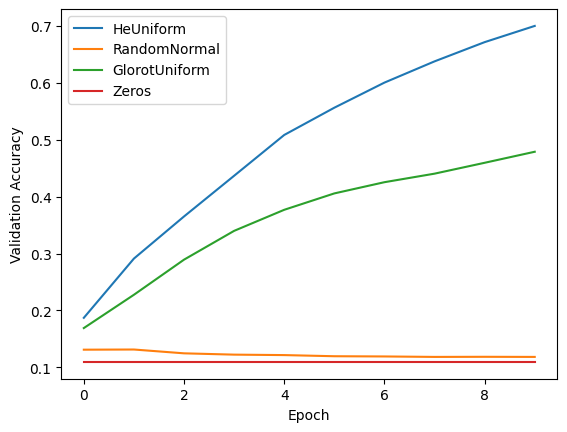

In [19]:
for i in [model_heu, model_normal, model_glorotu, model_zeros]:
    plt.plot(i.history.history['val_accuracy'], label=i.get_config()['layers'][1]['config']['kernel_initializer']['class_name'])

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')

In [20]:
def simple_model_bn(initializer = 'he_uniform', activation='relu'):
    return tf.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=tf.keras.initializers.glorot_normal())



    ])


In [21]:
simple_model_bn().summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                25120     
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_21 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_22 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_2 (Bat  (None, 32)               

In [22]:
init = tf.keras.initializers.random_normal()
activate = 'relu'

optimizer = tf.keras.optimizers.SGD(0.01)
model_bn = simple_model_bn(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 1s 16ms/step - loss: 2.0388 - accuracy: 0.3216 - val_loss: 2.2964 - val_accuracy: 0.1593
Epoch 2/10
19/19 [==============================] - 0s 7ms/step - loss: 1.3388 - accuracy: 0.5782 - val_loss: 2.2859 - val_accuracy: 0.1933
Epoch 3/10
19/19 [==============================] - 0s 7ms/step - loss: 1.0617 - accuracy: 0.6805 - val_loss: 2.2717 - val_accuracy: 0.2066
Epoch 4/10
19/19 [==============================] - 0s 7ms/step - loss: 0.8943 - accuracy: 0.7395 - val_loss: 2.2527 - val_accuracy: 0.2297
Epoch 5/10
19/19 [==============================] - 0s 7ms/step - loss: 0.7860 - accuracy: 0.7741 - val_loss: 2.2276 - val_accuracy: 0.2664
Epoch 6/10
19/19 [==============================] - 0s 9ms/step - loss: 0.7063 - accuracy: 0.7986 - val_loss: 2.1950 - val_accuracy: 0.3079
Epoch 7/10
19/19 [==============================] - 0s 7ms/step - loss: 0.6459 - accuracy: 0.8162 - val_loss: 2.1530 - val_accuracy: 0.3570
Epoch 8/10
19/19 [=

In [23]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
model_bn_ad = simple_model_bn(init, activate)
model_bn_ad.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_ad.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 1s 15ms/step - loss: 1.1378 - accuracy: 0.6580 - val_loss: 2.2985 - val_accuracy: 0.1623
Epoch 2/10
19/19 [==============================] - 0s 8ms/step - loss: 0.4948 - accuracy: 0.8630 - val_loss: 2.2930 - val_accuracy: 0.2574
Epoch 3/10
19/19 [==============================] - 0s 7ms/step - loss: 0.3745 - accuracy: 0.8977 - val_loss: 2.2867 - val_accuracy: 0.1916
Epoch 4/10
19/19 [==============================] - 0s 8ms/step - loss: 0.3144 - accuracy: 0.9135 - val_loss: 2.2781 - val_accuracy: 0.2043
Epoch 5/10
19/19 [==============================] - 0s 8ms/step - loss: 0.2749 - accuracy: 0.9249 - val_loss: 2.2672 - val_accuracy: 0.2144
Epoch 6/10
19/19 [==============================] - 0s 8ms/step - loss: 0.2461 - accuracy: 0.9333 - val_loss: 2.2522 - val_accuracy: 0.2417
Epoch 7/10
19/19 [==============================] - 0s 9ms/step - loss: 0.2245 - accuracy: 0.9395 - val_loss: 2.2334 - val_accuracy: 0.2632
Epoch 8/10
19/19 [=

In [24]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_adam.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

Epoch 1/10
19/19 [==============================] - 1s 17ms/step - loss: 0.9549 - accuracy: 0.7013 - val_loss: 2.0576 - val_accuracy: 0.5860
Epoch 2/10
19/19 [==============================] - 0s 8ms/step - loss: 0.3018 - accuracy: 0.9105 - val_loss: 1.8416 - val_accuracy: 0.5342
Epoch 3/10
19/19 [==============================] - 0s 7ms/step - loss: 0.1955 - accuracy: 0.9427 - val_loss: 1.6885 - val_accuracy: 0.5783
Epoch 4/10
19/19 [==============================] - 0s 8ms/step - loss: 0.1435 - accuracy: 0.9585 - val_loss: 1.5288 - val_accuracy: 0.6717
Epoch 5/10
19/19 [==============================] - 0s 8ms/step - loss: 0.1145 - accuracy: 0.9670 - val_loss: 1.3475 - val_accuracy: 0.7527
Epoch 6/10
19/19 [==============================] - 0s 8ms/step - loss: 0.0924 - accuracy: 0.9735 - val_loss: 1.1282 - val_accuracy: 0.8737
Epoch 7/10
19/19 [==============================] - 0s 9ms/step - loss: 0.0764 - accuracy: 0.9784 - val_loss: 0.9473 - val_accuracy: 0.8933
Epoch 8/10
19/19 [=

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=2000, callbacks=[es], validation_data = (X_test, y_test), verbose=0)

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_test, y_test, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Restoring model weights from the end of the best epoch: 15.
Epoch 25: early stopping
Train Acc: 0.9917166829109192 Test Acc: 0.9677000045776367
